In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate

A quantum support vector machine (QSVM) is a variant of the classical support vector machine (SVM) algorithm that uses quantum computing resources to perform the training and prediction tasks.

Like the classical SVM algorithm, the QSVM algorithm is a supervised learning algorithm that can be used for classification and regression tasks. The goal of the QSVM algorithm is to find the best linear decision boundary that separates the different classes in the data, in such a way that the margin between the decision boundary and the closest examples from each class is maximized.

The main difference between the classical SVM algorithm and the QSVM algorithm is the way the decision boundary is found. In the classical SVM algorithm, the decision boundary is found by solving a convex optimization problem using linear algebra operations. In the QSVM algorithm, the decision boundary is found by mapping the input vectors to a higher-dimensional space using a quantum circuit, and then solving the optimization problem in this higher-dimensional space.

The QSVM algorithm is useful in situations where the classical SVM algorithm is not able to find a good decision boundary due to the limitations of classical computing resources. By using quantum computing resources, the QSVM algorithm can find a decision boundary in a higher-dimensional space, which can improve the performance of the SVM algorithm.

## Quantum Feature Maps

We implement Quantum Feature Maps with variational quantum circuits $\mathcal{E}(\vec{x})$:

$$
\mathcal{E} : \mathbb{R}^n \rightarrow \mathcal{V}
$$

$$ 
\vec{x} \mapsto \ket{\psi(\vec{x})}
$$

<center>
<img src="./img/feature_map.png" width="150" height="200">
<center>

[0.59845039 0.46421105 0.29640966 0.43607954]


/Users/mghasemi/Desktop/Code/Python/QML/Qiskit/venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:269: UserWarning: Style JSON file 'iqx.json' not found in any of these locations: /Users/mghasemi/Desktop/Code/Python/QML/Qiskit/venv/lib/python3.10/site-packages/qiskit/visualization/circuit/styles/iqx.json, iqx.json. Will use default style.
  self._style, def_font_ratio = load_style(self._style)


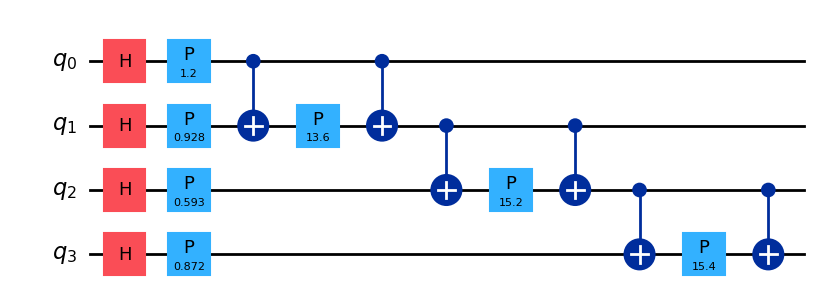

In [2]:
from qiskit.circuit.library import ZZFeatureMap

num_qubits = 4
x = np.random.random(num_qubits)    # Angle encoding which uses the iput data as angles and apply them to the |0> states
print(x)
data = ZZFeatureMap(feature_dimension=num_qubits, reps=1, entanglement="linear")
data.assign_parameters(x, inplace=True)
data.decompose().draw("mpl", style="iqx", scale=1.)

It creates a random input vector `x` of size `num_qubits` (4) and creates an instance of the `ZZFeatureMap` class. The `feature_dimension` parameter is set to `num_qubits`, the `reps` parameter is set to 1, which means the circuit will be applied once to the qubits, and the `entanglement` parameter is set to `'linear'`, which means that the qubits will be fully connected.

The `assign_parameters` method is used to assign the random input vector `x` to the circuit's parameters. The `inplace=True` parameter tells the method to update the parameters in place, which means that the circuit's parameters are updated directly.

The `decompose()` method is used to decompose the circuit into a set of gates that can be executed on a real quantum computer, and the `draw()` method is used to display the circuit. The `'mpl'` parameter tells the method to display the circuit using the Matplotlib library, the `'style'` parameter is set to `'iqx'` which the same drawer style as the IBMQ Experience platform and the `'scale'` parameter is set to 1.4, which sets the size of the circuit.

This circuit is useful when we want to perform a quantum machine learning task, `ZZFeatureMap` is a circuit that can be used to map input data points to higher-dimensional space, so that it can be possible to find a linear decision boundary in higher-dimensional space. By using this circuit, we can map input data points to a higher-dimensional space, and then use quantum algorithms to classify these points.

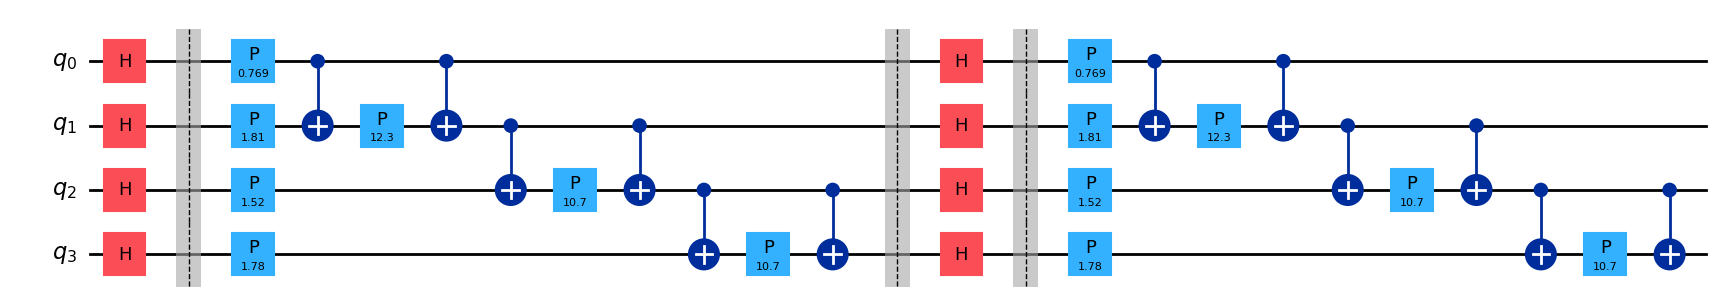

In [3]:
from qiskit.circuit.library import ZZFeatureMap

num_qubits = 4
x = np.random.random(num_qubits)
data = ZZFeatureMap(
    feature_dimension=num_qubits, reps=2, entanglement="linear", insert_barriers=True
)
data.assign_parameters(x, inplace=True)
data.decompose().draw("mpl", style="iqx")

This code snippet is similar to the previous one, but with a few differences. It also creates a quantum circuit that applies a `ZZFeatureMap` to a set of qubits, but the `reps` parameter is now set to 2, which means that the circuit will be applied 2 times to the qubits.

The `insert_barriers` parameter is set to `True`, which means that barriers will be inserted between the repetitions of the circuit. These barriers are used to ensure that the different repetitions of the circuit are executed independently of one another. This is useful when the circuit is executed on a real quantum computer, as it can help to mitigate errors that may be caused by crosstalk between different qubits.

By applying the circuit multiple times, we increase the feature dimension of the input data points. This can potentially improve the classification performance of the circuit.

## Building a quantum kernel

The quantum kernel $k \left( \vec{x} , \vec{x}' \right)$ to be evaluated as 

$$
k \left( \vec{x} , \vec{x}' \right) = \left| \left< \psi(\vec{x}') | \psi(\vec{x}) \right> \right |^2 = \left| \left<0 | \mathcal{E}^\dagger(\vec{x}')  \mathcal{E}(\vec{x}) | 0 \right> \right |^2
$$ 

<center>
<img src="./img/qkernel.png" width=300 height=300>

### Using Qiskit Only

In [16]:
from qiskit import transpile, QuantumCircuit
from qiskit_aer import Aer


#backend = BasicAer.get_backend("qasm_simulator")
backend = Aer.get_backend("qasm_simulator")
shots = 1024

#dimention = 10
dimention = 6
feature_map = ZZFeatureMap(dimention, reps=1)

This code snippet is using Qiskit to create a quantum circuit that applies a `ZZFeatureMap` to a set of qubits, and then simulates the circuit using a basic quantum assembly language (QASM) simulator backend.

The `BasicAer.get_backend('qasm_simulator')` function is used to create an instance of the QASM simulator backend. This backend can be used to simulate the circuit using a classical computer.

The `'shots'` variable is set to 1024, which means that the circuit will be executed 1024 times and the results will be collected and averaged.

The dimention variable is set to 2, which means that the circuit will be applied to 2 qubits. The `feature_map` variable is an instance of the `ZZFeatureMap` class, which is set to use the 2 qubits and apply the circuit only once.

In [17]:
def evaluate_kernel(x_i, x_j):
    """
    Evaluates the dot product of two input vectors in a higher dimensional space using a quantum circuit.

    Parameters:
    -----------

    `x_i` : array-like, The first input vector of shape `(d,)`.
    `x_j` : array-like, The second input vector of shape `(d,)`.

    Returns:
    --------

    `float`: The dot product of `x_i` and `x_j` in the higher dimensional space.
    """
    circuit = QuantumCircuit(dimention)
    circuit.compose(feature_map.assign_parameters(x_i), inplace=True)
    circuit.compose(feature_map.assign_parameters(x_j).inverse(), inplace=True)
    circuit.measure_all()

    transpiled = transpile(circuit, backend)
    counts = backend.run(transpiled, shots=shots).result().get_counts()
    #print(counts.get("0" * dimention, 0) / shots)
    #print(counts.get("1" * dimention, 0) / shots)
    #print(counts.get("10", 0) / shots)
    #print(counts.get("00", 0) / shots)

    return counts.get("0" * dimention, 0) / shots

This code snippet defines a function `evaluate_kernel` that takes two input vectors `x_i` and `x_j` and returns the dot product of these vectors in a higher dimensional space.

The function starts by creating an instance of the `QuantumCircuit` class with dimention number of qubits. Then, it composes the `feature_map` circuit with the parameters `x_i` and `x_j`, and applies the inverse of the circuit with `x_j`. This operation is equivalent to applying the `feature_map` circuit to both `x_i` and `x_j`, and taking their dot product in the higher dimensional space.

It then measures all qubits, in order to obtain a binary string that represents the dot product of the two input vectors.

Then it uses the `transpile` function to convert the circuit into a form that can be run on the backend. It runs the circuit on the backend, by passing the transpiled circuit and the number of shots to the `run` method. It gets the results of the simulation by calling the `result()` method, and then gets the counts of all the binary strings that were obtained by measuring the qubits.

It returns the count of the binary string `'0'*dimention` divided by the number of shots. This value is an estimate of the dot product of the two input vectors in the higher dimensional space, which is known as the kernel trick.

This function can be useful when we want to compute the kernel function of two input vectors in a quantum machine learning algorithm.

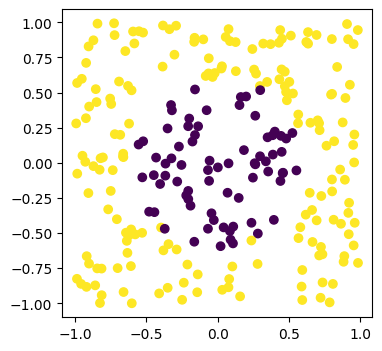

0.1298828125
0.7373046875
0.1083984375
0.1298828125
0.1298828125


In [8]:
from data_generators import circle
import numpy as np
import matplotlib.pyplot as plt

X, y = circle()     # 2D X and 1D y

plt.figure(figsize=(4, 4))
#plt.scatter(np.array(X)[:, 0], np.array(X)[:, 1], c=y)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

print(evaluate_kernel(X[2], X[3]))

/Users/mghasemi/Desktop/Code/Python/QML/Qiskit/venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:269: UserWarning: Style JSON file 'iqx.json' not found in any of these locations: /Users/mghasemi/Desktop/Code/Python/QML/Qiskit/venv/lib/python3.10/site-packages/qiskit/visualization/circuit/styles/iqx.json, iqx.json. Will use default style.
  self._style, def_font_ratio = load_style(self._style)


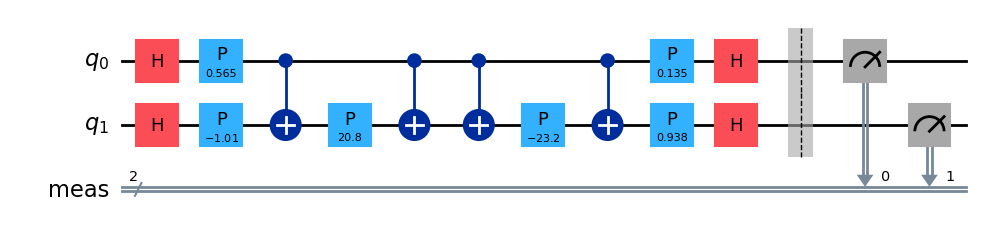

In [9]:
x_i = X[2]
#x_j = X[2]
x_j = X[3]

circuit = QuantumCircuit(dimention)
circuit.compose(feature_map.assign_parameters(x_i), inplace=True)
circuit.compose(feature_map.assign_parameters(x_j).inverse(), inplace=True)
circuit.measure_all()
circuit.decompose().draw("mpl", style="iqx")

This code is using the `evaluate_kernel` function that you defined earlier and it's calling it with two points, `X[2]` and `X[3]` from the `circle` data set. It is using the `evaluate_kernel` function to evaluate the kernel function on these two points.

This code can be used to evaluate the kernel function on a pair of input points, which can be useful in evaluating the performance of the QSVM algorithm.

### Using Qiskit Nature

In [6]:
# Qiskit imports
from qiskit.visualization import circuit_drawer
from qiskit_algorithms.optimizers import SPSA
from qiskit_machine_learning.kernels import TrainableFidelityQuantumKernel
from qiskit_machine_learning.kernels.algorithms import QuantumKernelTrainer
from qiskit_machine_learning.algorithms import QSVC

In [18]:
#from qiskit_machine_learning.kernels import QuantumKernel

#kernel = QuantumKernel(feature_map, quantum_instance=backend)
kernel = TrainableFidelityQuantumKernel(
    feature_map=feature_map
)
#kernel.evaluate(X[2], X[3])
#kernel.evaluate(X[2], X[3])

This code is using the `QuantumKernel` class provided by the `qiskit_machine_learning` library to evaluate the kernel function on the two points `X[2]` and `X[3]` from the `circle` data set.

The QuantumKernel class is a wrapper around the `evaluate_kernel` function that you defined earlier. It takes the feature map circuit and `quantum_instance` as input and creates an object that can be passed as the kernel parameter of a `scikit-learn` estimator. The `evaluate` method of the `QuantumKernel` object takes two input points and applies the same steps as the `evaluate_kernel` function, but it is more convenient to use as it is integrated with the `scikit-learn` library.

The `QuantumKernel` class is a flexible kernel that can be used with a variety of quantum machine learning algorithms. It takes a quantum circuit as an input, which is used to map the input vectors to a higher dimensional space, and it returns a kernel function that can be used to compute the dot product of two input vectors in the higher dimensional space.

## Classification

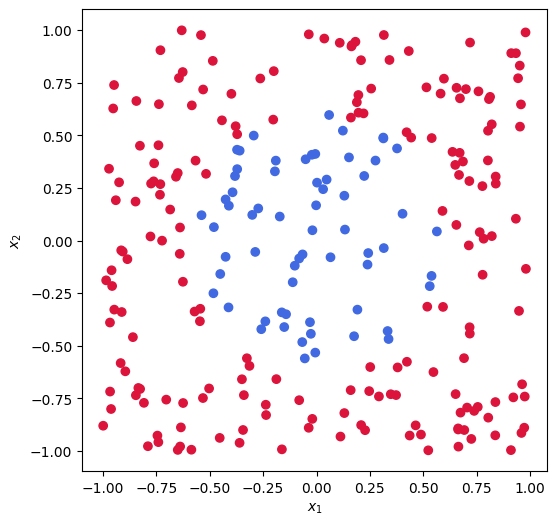

In [12]:
points, labels = circle()
colors = ["crimson" if label == 1 else "royalblue" for label in labels]

plt.figure(figsize=(6, 6))
plt.scatter(points[:, 0], points[:, 1], c=colors)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [28]:
print(type(points))
print(points.shape)
print(type(labels))
print(labels)

<class 'numpy.ndarray'>
(250, 2)
<class 'list'>
[1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1]


This code snippet uses the `circle` function from `data_generators` module to generate a set of points that form a circle. The `circle` function takes one optional parameter `num_points` which defaults to 250. It creates random points between `(-1,-1)` and `(1,1)` and labels them as 1 if they are outside of radius of 0.6 and -1 if they are inside the radius of 0.6.

Then it creates an array of colors to be used when plotting the points. It uses `"crimson"` color for points with label 1 and `"royalblue"` color for points with label -1.

Next it creates a scatter plot of the points using Matplotlib library. It sets the x-axis label to `"$x_1$"` and y-axis label to `"$x_2$"`. The scatter plot is showing the points generated by the `circle` function in a scatter plot, with the points inside the circle labeled as -1 in blue color, and points outside the circle labeled as 1 in red color.

### Jet charge

In [36]:
if True:
    final_df = pd.read_csv('./uubar.csv')
    print(tabulate(final_df.head(), headers='keys', tablefmt='psql'))

+----+-------------+-------------+-------------+-------------+-------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+-----------------+-----------------+-----------------+-----------------+-----------------+-------------+-------------+-------------+-------------+-------------+---------+-----------+-----------+-----------+------------+----------------+------------------+------------------+------------------+----------------+---------+-----------+-----------+-----------+------------+----------------+------------------+------------------+------------------+----------------+---------+------------+------------+------------+------------+---------+------------+------------+------------+------------+---------+-----------+-----------+-----------+------------+---------+-----------+-----------+-----------+------------+----------------+--------------+--------------------+------------+
|    

In [47]:
# Read file and run QSVM
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve
import pickle

df = pd.read_csv('./uubar.csv')
AUC = {}
for kappa in [0, 0.3, 0.5, 0.7, 1]:
    AUC[kappa] = []

#for num in [10, 20, 50, 100, 200, 500]:
for num in [10, 20]:
    df_up = df[df['jet_type'] == 1].sample(n=num, random_state=42)
    df_antiup = df[df['jet_type'] == 0].sample(n=num, random_state=42)
    final_df = pd.concat([df_up, df_antiup], ignore_index=True)
    cols = list(final_df.columns)

    for kappa in [0, 0.3, 0.5, 0.7, 1]:    
        columns = [col for col in cols if col.startswith('Q_') and col.endswith('_'+str(kappa))]
        #print(columns)
        X = final_df[columns].values
        y = final_df['jet_type'].values.reshape(-1)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
        #print(X.shape)
        #print(y.shape)
        qsvm = SVC(kernel=kernel.evaluate)
        qsvm.fit(X_train, y_train)
        
        # Get the predicted probabilities or decision function scores
        if hasattr(qsvm, "predict_proba"):
            y_probs = qsvm.predict_proba(X_test)[:, 1]
        else:
            y_scores = qsvm.decision_function(X_test)
            # Normalize decision function scores to [0, 1] range for ROC AUC
            y_probs = (y_scores - y_scores.min()) / (y_scores.max() - y_scores.min())
        # Compute the AUC score
        auc_score = round(roc_auc_score(y_test, y_probs), 4)
        print(f'AUC Score: {auc_score}')

        # Compute ROC curve
        fpr, tpr, thresholds = roc_curve(y_test, y_probs)

        # AUC append
        AUC[kappa].append(auc_score)        

        if False:
            plt.figure()
            plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc_score:.4f})')
            plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver Operating Characteristic (ROC) Curve')
            plt.legend(loc='lower right')
            plt.show()
        
        with open('./models/model_'+str(num)+'_'+str(kappa)+'.pkl','wb') as f:
            print(f, " is created")
            pickle.dump(qsvm,f)
print(AUC)            

AUC Score: 0.6667
<_io.BufferedWriter name='./models/model_10_0.pkl'>  is created
AUC Score: 0.7778
<_io.BufferedWriter name='./models/model_10_0.3.pkl'>  is created
AUC Score: 0.0
<_io.BufferedWriter name='./models/model_10_0.5.pkl'>  is created
AUC Score: 0.3333
<_io.BufferedWriter name='./models/model_10_0.7.pkl'>  is created
AUC Score: 0.3333
<_io.BufferedWriter name='./models/model_10_1.pkl'>  is created
AUC Score: 0.3333
<_io.BufferedWriter name='./models/model_20_0.pkl'>  is created
AUC Score: 0.4722
<_io.BufferedWriter name='./models/model_20_0.3.pkl'>  is created
AUC Score: 0.5278
<_io.BufferedWriter name='./models/model_20_0.5.pkl'>  is created
AUC Score: 0.7778
<_io.BufferedWriter name='./models/model_20_0.7.pkl'>  is created
AUC Score: 0.5278
<_io.BufferedWriter name='./models/model_20_1.pkl'>  is created
{0: [0.6667, 0.3333], 0.3: [0.7778, 0.4722], 0.5: [0.0, 0.5278], 0.7: [0.3333, 0.7778], 1: [0.3333, 0.5278]}


In [43]:
for kappa in [0, 0.3, 0.5, 0.7, 1]:    
    with open('./models/model_'+str(kappa)+'.pkl', 'rb') as f:
        clf = pickle.load(f)
        predict = clf.predict(X_test)
        print('model'+str(kappa)+':', clf.score(X_test, y_test))

model0: 0.5833333333333334
model0.3: 0.5833333333333334
model0.5: 0.5833333333333334
model0.7: 0.4166666666666667
model1: 0.5


In [19]:
from sklearn.svm import SVC

qsvm = SVC(kernel=kernel.evaluate)
qsvm.fit(points, labels)
predicted = qsvm.predict(points)

In [20]:
qsvm.score(points, labels)

0.964

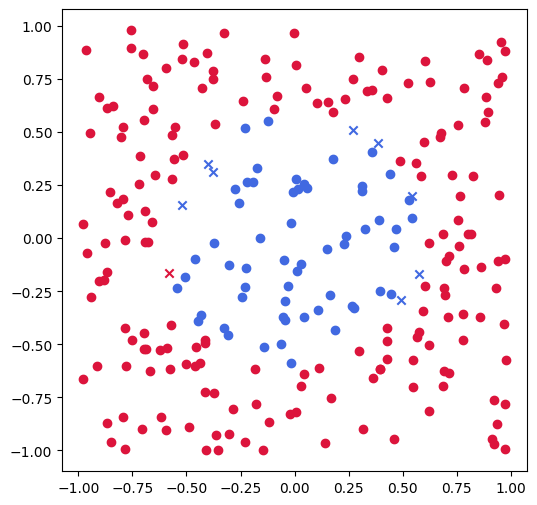

In [21]:
markers = [
    "o" if label == predicted_label else "x"
    for label, predicted_label in zip(labels, predicted)
]

plt.figure(figsize=(6, 6))
for point, marker, color in zip(points, markers, colors):
    plt.scatter(point[0], point[1], c=color, marker=marker)
plt.show()

In [26]:
svm = SVC(kernel='rbf', gamma=0.5, C=1.0)
svm.fit(points, labels)
predicted_svm = svm.predict(points)
svm.score(points, labels)

0.964

This code snippet uses the `scikit-learn` library to train a support vector machine (SVM) on the points generated by the `circle` function. It first creates an instance of the `SVC` class, which is an implementation of the SVM algorithm in `scikit-learn`. The kernel parameter is set to the evaluate method of the previously defined kernel object, which is a quantum kernel implemented using the `QuantumKernel` class.

It then calls the `fit` method on the `qsvm` object, passing in the `points` and `labels` generated by the circle function. This trains the SVM model on the data.

The predict method is called on the `qsvm` object, passing in the points generated by the `circle` function. This applies the trained model to the data and returns the predicted labels for each point. The predicted labels are saved in the `predicted` variable

This code snippet is useful for training a support vector machine on a set of data using a quantum kernel. The quantum kernel can help to find a linear decision boundary in a higher-dimensional space, which can improve the performance of the SVM algorithm.

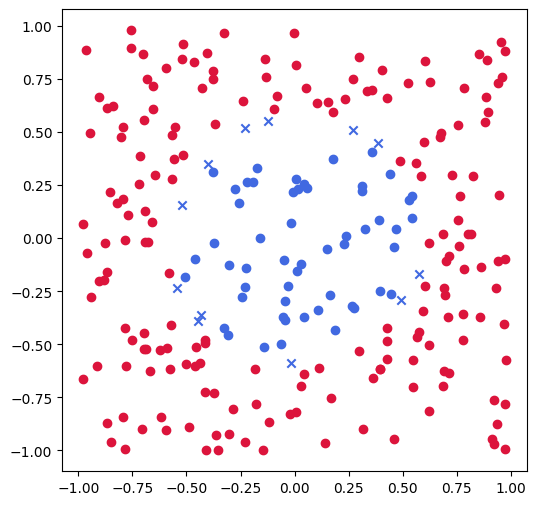

In [23]:
markers = [
    "o" if label == predicted_label else "x"
    for label, predicted_label in zip(labels, predicted_svm)
]

plt.figure(figsize=(6, 6))
for point, marker, color in zip(points, markers, colors):
    plt.scatter(point[0], point[1], c=color, marker=marker)
plt.show()

The plot shows the points generated by the `circle` function in a scatter plot, with the points that were correctly classified by the SVM model labeled as `'o'` in red or blue color, and points that were misclassified by the SVM model labeled as `'x'` in red or blue color.

In [38]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.utils import QuantumInstance
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit.circuit.library import ZZFeatureMap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Sample data (22498, 68) numpy array
X = np.random.rand(22498, 68)
Y = np.random.choice([0, 1], 22498)

# Preprocess the data: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Define the feature map
feature_map = ZZFeatureMap(feature_dimension=68, reps=2, entanglement='linear')

# Set up the quantum kernel
#quantum_instance = QuantumInstance(backend=Aer.get_backend('statevector_simulator'))
quantum_instance = QuantumInstance(backend= Aer.get_backend("qasm_simulator"))
kernel = TrainableFidelityQuantumKernel(
    feature_map=feature_map
)
#quantum_kernel = QuantumKernel(feature_map=feature_map, quantum_instance=quantum_instance)

# Initialize the QSVM
qsvc = QSVC(kernel=kernel.evaluate())

# Train the QSVM
qsvc.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = qsvc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Optionally, print the predictions
print(f"Predictions: {Y_pred}")


ImportError: cannot import name 'QuantumInstance' from 'qiskit.utils' (/Users/mghasemi/Desktop/Code/Python/QML/Qiskit/venv/lib/python3.10/site-packages/qiskit/utils/__init__.py)

In [34]:
def circle_3D(num_points=250):
    """
    Generates a synthetic dataset of points distributed in a circle.

    Parameters:
    ------------

        `num_points`: `int`, the number of points in the dataset.

    Returns:
    --------

        `tuple`: (`points`, `labels`), where points is a 2D array of size `(num_points, 2)` and labels is a 1D array of size `num_points`.
    """
    points = 1 - 2 * np.random.random((num_points, 3))
    radius = 0.6
    labels = [1 if np.linalg.norm(point) > radius else -1 for point in points]
    return points, labels

points_3D, labels_3D = circle_3D()



In [ ]:
import pennylane as qml
from pennylane import numpy as np

from sklearn.model_selection import train_test_split
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score

from sklearn.svm import SVC

num_qubits = 4

def layer(x):
    
    qml.BasisEmbedding(x, wires=range(num_qubits))
    
    for j, wire in enumerate(wires):
        qml.Hadamard(wires=[wire])
        if j != num_qubits-1:
            qml.CNOT(wires=[j, j+1])
        else:
            qml.CNOT(wires=[j, 0])

def ansatz(x, wires):
    layer(x)

adjoint_ansatz = qml.adjoint(ansatz)

dev = qml.device("default.qubit", wires=num_qubits, shots=None)
wires = dev.wires.tolist()

@qml.qnode(dev, interface="autograd")
def kernel_circuit(x1, x2):
    ansatz(x1, wires=wires)
    adjoint_ansatz(x2, wires=wires)
    return qml.probs(wires=wires)

def kernel(x1, x2):
    return kernel_circuit(x1, x2)[0]

df_train = pd.read_csv('train.csv')

df_train['Pclass'] = df_train['Pclass'].astype(str)

df_train = pd.concat([df_train, pd.get_dummies(df_train[['Pclass', 'Sex', 'Embarked']])], axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_train.drop(columns=['Survived']), df_train['Survived'], test_size=0.10, random_state=42, stratify=df_train['Survived'])

X_train['Age'] = X_train['Age'].fillna(X_train['Age'].median())
X_test['Age'] = X_test['Age'].fillna(X_test['Age'].median())

X_train['is_child'] = X_train['Age'].map(lambda x: 1 if x < 12 else 0)
X_test['is_child'] = X_test['Age'].map(lambda x: 1 if x < 12 else 0)

cols_model = ['is_child', 'Pclass_1', 'Pclass_2', 'Sex_female']

X_train = X_train[cols_model]
X_test = X_test[cols_model]

X_train = np.array(X_train.values, requires_grad=False)

init_kernel = lambda x1, x2: kernel(x1, x2)
K = qml.kernels.square_kernel_matrix(X_train, init_kernel, assume_normalized_kernel=True)

svm = SVC(kernel=lambda X1, X2: qml.kernels.kernel_matrix(X1, X2, init_kernel)).fit(X_train, y_train)

X_test = np.array(X_test.values, requires_grad=False)

predictions = svm.predict(X_test)

accuracy_score(y_test, predictions)
precision_score(y_test, predictions)
recall_score(y_test, predictions)
f1_score(y_test, predictions, average='macro')

svm1 = SVC(gamma='auto', kernel='rbf')
svm1.fit(X_train, y_train)

y_pred = svm1.predict(X_test)

accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred)
recall_score(y_test, y_pred)
f1_score(y_test, y_pred, average='macro')